In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import datetime 
import seaborn as sns 

plt.style.use('seaborn')

In [2]:
start = datetime.date(2005,1,1)
end = datetime.date(2022,1,1)
ticker = "GOOG"

In [3]:
df = yf.download(tickers = ticker,start = start,end = end
                )

[*********************100%***********************]  1 of 1 completed


In [4]:
df1 = df.copy()

In [5]:
df1

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-12-31,4.962151,4.978340,4.796023,4.801752,4.801752,307889737
2005-01-03,4.916571,5.071989,4.868253,5.048826,5.048826,636143518
2005-01-04,5.016198,5.054305,4.818937,4.844342,4.844342,552298420
2005-01-05,4.818190,4.904118,4.787804,4.819685,4.819685,330698912
2005-01-06,4.858788,4.879212,4.675475,4.696148,4.696148,417041336
...,...,...,...,...,...,...
2021-12-27,147.463501,148.426498,147.250000,148.063995,148.063995,13256000
2021-12-28,148.374496,148.374496,145.935501,146.447998,146.447998,18624000
2021-12-29,146.429504,147.183746,145.504501,146.504501,146.504501,17022000


In [6]:
df1.drop(columns = {'Open','High','Low',"Close",'Volume'},inplace = True)

In [7]:
df1.rename(columns = {'Adj Close':'adj_close'},inplace = True)

In [8]:
df1['simple_returns'] = df1.adj_close.pct_change()
df1['log_returns'] = df1.adj_close/df1.adj_close.shift(1)

In [9]:
df1.dropna()

,adj_close,simple_returns,log_returns
Date,,,
2005-01-03,5.048826,0.051455,1.051455
2005-01-04,4.844342,-0.040501,0.959499
2005-01-05,4.819685,-0.005090,0.994910
2005-01-06,4.696148,-0.025632,0.974368
2005-01-07,4.828153,0.028109,1.028109
...,...,...,...
2021-12-27,148.063995,0.006263,1.006263
2021-12-28,146.447998,-0.010914,0.989086
2021-12-29,146.504501,0.000386,1.000386


In [10]:
%matplotlib inline

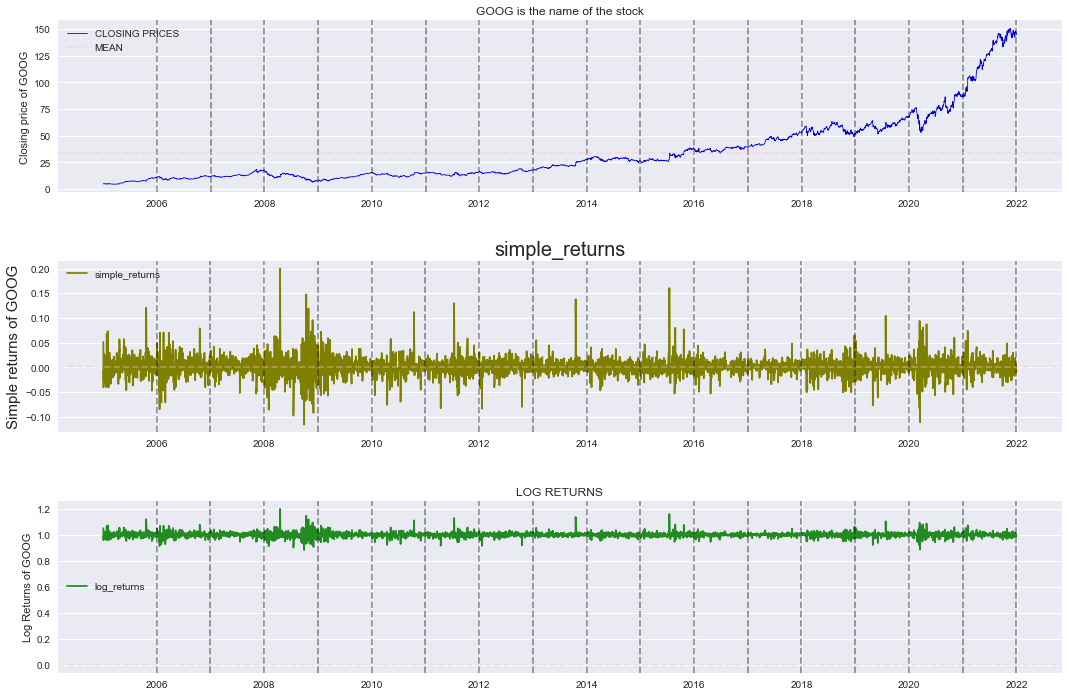

In [11]:
m = 3
n = 1

fig , ax = plt.subplots(m,n,figsize=(18,12))

ax[0].plot(df1['adj_close'],color = 'mediumblue',label = "CLOSING PRICES",linewidth = 0.8)
ax[0].set_title(f"{ticker} is the name of the stock",fontsize = 12)
ax[0].set_ylabel(f"Closing price of {ticker}")

ax[1].plot(df1['simple_returns'],color = 'olive',label = "simple_returns")
ax[1].set_title('simple_returns',fontsize = 20)
ax[1].set_ylabel(f"Simple returns of {ticker}",fontsize = 15)

ax[2].plot(df1['log_returns'],color = 'forestgreen',label = "log_returns")
ax[2].set_title(f'LOG RETURNS')
ax[2].set_ylabel(f'Log Returns of {ticker}')

for i in range(3):
    for year in range(start.year,end.year):
        ax[i].axvline(pd.to_datetime(str(year)+ "-12-31"),color = 'black',linestyle = "--",alpha = 0.4)
         
ax[0].axhline(df1['adj_close'].mean(),label = 'MEAN',color = 'pink',linestyle = '--',alpha = 0.4)
ax[1].axhline(0,color = 'pink',linestyle = '--',alpha = 0.4)
ax[2].axhline(0,color = 'pink',linestyle = '--',alpha = 0.4)

ax[0].legend(loc='best')
ax[1].legend(loc='best')
ax[2].legend(loc='best')

plt.subplots_adjust(hspace=0.4)

In [12]:
def realized_vol(x):
    return np.sqrt(np.sum(x ** 2))

In [13]:
df1_real_vol = df1.groupby(pd.Grouper(freq = 'M'))[['log_returns']].apply(realized_vol)

In [14]:
df1_real_vol.rename(columns = {'log_returns':'realized_vol'},inplace = True)

In [15]:
df1_real_vol['realized_vol'] = df1_real_vol['realized_vol'] * np.sqrt(12)

In [16]:
df1_real_vol.dropna(inplace = True)

In [17]:
m = 2
n = 1

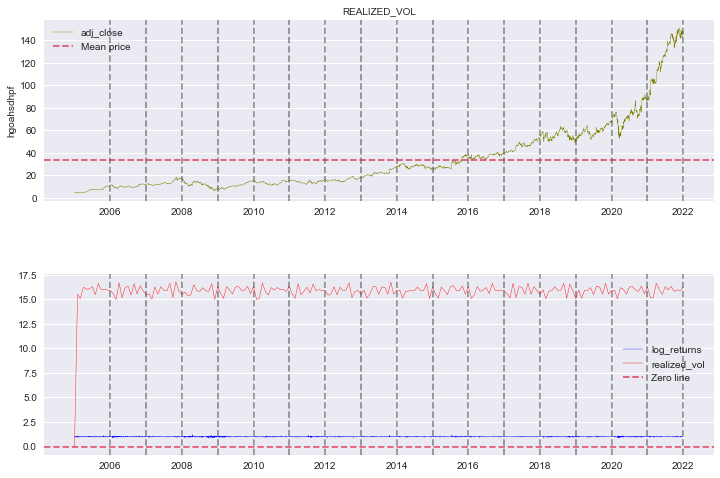

In [18]:
fig , ax = plt.subplots(m,n,figsize = (12,8))

ax[0].plot(df1['adj_close'],label = 'adj_close',linewidth = 0.4,color = 'olive')
ax[0].set_title("REALIZED_VOL",fontsize =10)
ax[0].set_ylabel('hgoahsdhpf',fontsize = 10)

ax[1].plot(df1['log_returns'],color = 'blue',linewidth = 0.4,label = 'log_returns')
ax[1].plot(df1_real_vol['realized_vol'],color = 'red',linewidth = 0.4,label = "realized_vol")

for i in range(2):
    for eachyear in range(start.year,end.year):
        ax[i].axvline(pd.to_datetime(str(eachyear)+'-12-31'), color='black', linestyle='--', alpha=0.4)
        
ax[0].axhline(df1['adj_close'].mean(), label='Mean price', color='crimson', linestyle='--', alpha=0.7)
ax[1].axhline(0, color='crimson', label='Zero line', linestyle='--', alpha=0.7)


# Legend addition
ax[0].legend(loc='best')
ax[1].legend(loc='best')


# To set the spacing between subplots
plt.subplots_adjust(hspace=0.4)


In [19]:
df1_rolling_stats = df1['simple_returns'].rolling(window = 12).agg(['mean','std'],axis='rows')

In [20]:
df_all = df1.join(df1_rolling_stats)

In [21]:
df_all.dropna(inplace = True)

In [22]:
def catch_outliners(row,n_sigmas = 3):
    x = row['simple_returns']
    μ = row['mean']
    σ = row['mean']
    if (x > μ + 3 * σ) | (x < μ - 3 * σ):
        return 1
    else:
        return 0

In [23]:
df_all['outliner'] = df_all.apply(catch_outliners, axis='columns')

In [24]:
df_all

,adj_close,simple_returns,log_returns,mean,std,outliner
Date,,,,,,
2005-01-19,4.914081,-0.032369,0.967631,0.002257,0.026779,1
2005-01-20,4.829896,-0.017131,0.982869,-0.003459,0.022262,1
2005-01-21,4.689423,-0.029084,0.970916,-0.002507,0.020726,1
2005-01-24,4.501129,-0.040153,0.959847,-0.005429,0.023420,1
2005-01-25,4.411465,-0.019920,0.980080,-0.004953,0.023027,1
...,...,...,...,...,...,...
2021-12-27,148.063995,0.006263,1.006263,-0.000299,0.012365,1
2021-12-28,146.447998,-0.010914,0.989086,-0.000864,0.012707,1
2021-12-29,146.504501,0.000386,1.000386,-0.001152,0.012629,1


In [25]:
outliers = df_all.loc[df_all['outliner']==1,['simple_returns']]

In [26]:
outliers.shape

(2816, 1)

In [27]:
%matplotlib inline

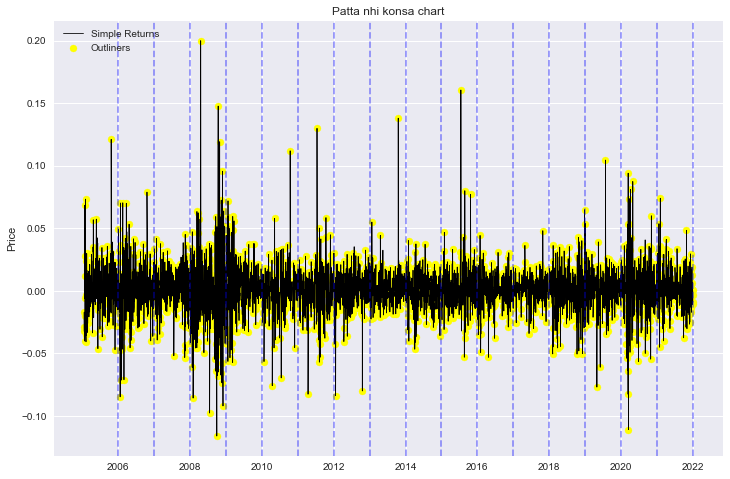

In [28]:
fig , ax = plt.subplots(figsize = (12,8))

ax.plot(df_all.index, df_all['simple_returns'],color = 'black',linewidth = 0.8,label = 'Simple Returns')

ax.scatter(outliers.index,outliers['simple_returns'],color = 'yellow',label = "Outliners")

ax.set(title = "Patta nhi konsa chart",ylabel = "Price")

for year in range(start.year,end.year):
    ax.axvline(pd.to_datetime(str(year) + '-12-31'),linestyle = '--',color = 'blue',alpha=0.4)
plt.legend(loc = 'best')

In [29]:
import scipy.stats as scs
import statsmodels.api as sm
import statsmodels.tsa.api as smt

In [30]:
start2 = datetime.date(1980, 1, 2)
end2 = datetime.date(2022,1,10)
ticker2 =  "^GSPC"

In [31]:
yf = yf.download(ticker2,start = start2,end = end2)

[*********************100%***********************]  1 of 1 completed


In [32]:
yf1 = yf.copy()

In [33]:
yf1.drop(columns = ['Open','High','Low','Close','Volume'],inplace = True)

In [34]:
yf1.rename(columns = {"Adj Close":"adj_close"},inplace = True)

In [35]:
yf1["log_r"] = np.log(yf1/yf1.shift())

In [36]:
yf1.dropna(inplace = True)

In [37]:
np.linspace(1,100,num = 50).round(0)

array([  1.,   3.,   5.,   7.,   9.,  11.,  13.,  15.,  17.,  19.,  21.,
        23.,  25.,  27.,  29.,  31.,  33.,  35.,  37.,  39.,  41.,  43.,
        45.,  47.,  49.,  52.,  54.,  56.,  58.,  60.,  62.,  64.,  66.,
        68.,  70.,  72.,  74.,  76.,  78.,  80.,  82.,  84.,  86.,  88.,
        90.,  92.,  94.,  96.,  98., 100.])

In [38]:
log_returns_range = np.linspace(min(yf1['log_r']),max(yf1['log_r']),num = 1000)
μ = yf1["log_r"].mean()
σ = yf1["log_r"].std()
norm_pdf = scs.norm.pdf(log_returns_range,loc=μ,scale = σ)

C:\Users\rajpu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Q_Q_PLOT')

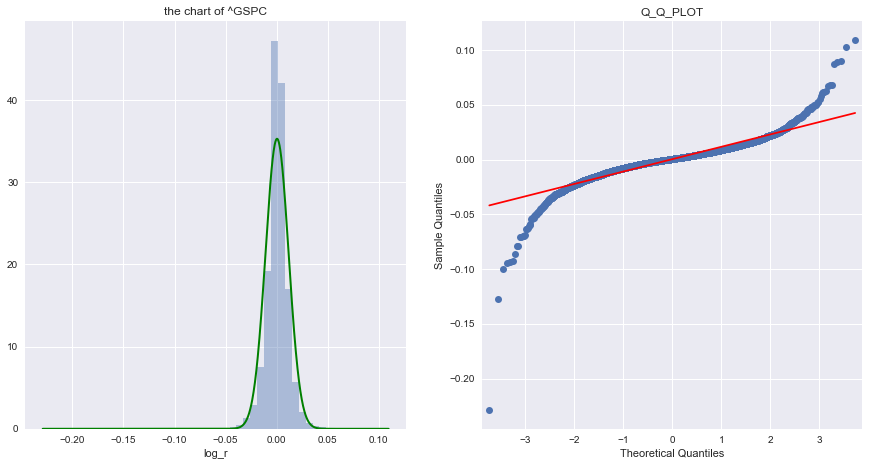

In [39]:
m = 1
n = 2

fig , ax = plt.subplots(m,n,figsize =(15,7.5))

sns.distplot(yf1["log_r"],kde = False,norm_hist = True,ax = ax[0] )
ax[0].set_title(f"the chart of {ticker2}",fontsize =12)
ax[0].set_label(f"{ticker2}")
ax[0].plot(log_returns_range,norm_pdf,color = "green",linewidth = 2,label=f"N({μ:.4f}, {σ**2:.5f}")

qq_plot = sm.qqplot(yf1["log_r"],line = "s",ax=ax[1])
ax[1].set_title("Q_Q_PLOT",fontsize =12)